 # Link To Code 
 
<https://github.com/eduparlema/eduparlema.github.io/blob/main/posts/perceptron%20/perceptron.py>

 # Walk-through of the Perception Update

In [51]:
def fit(self, X, y, max_steps):
      "Fits weights to data until it has reached 'max_steps' iterations or the accuracy equals 1"
      X_ = np.append(X, np.ones((X.shape[0], 1)), 1)
      self.w = np.random.random(X.shape[1] + 1)
      self.history = [self.score(X_, y)]
      y_ = 2*y - 1


      for _ in range(max_steps):
          i = np.random.randint(X.shape[0])
          self.w += (y_[i] * (np.dot(X_[i], self.w)) < 0) * y_[i]*X_[i]
          self.history.append(self.score(X_, y))
          if self.history[-1] == 1:
              break 


We first modify $X$ so it has an additional column of 1's. Then, we initialize the our weights randomly, store the initial accuracy value in the history array, and transform the label value from $[0,1]$ to $[-1,1]$. Finally, in each iteration of the for loop, we choose a random index and update the weights with the following equation from class and update the history array with the current accuracy value. Also, if at some point the accuracy is equal to 1, we simply stop the algorithm. 

 # Experiments 
 


In [52]:
%reload_ext autoreload 
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

from perceptron import Perceptron 

np.random.seed(12345)

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")


## Experiment 1

In this experiment we use 2d data to show that our perceptron algorithm converges to a weight vector $\tilde{w}$ describing a separating line as shown below. 

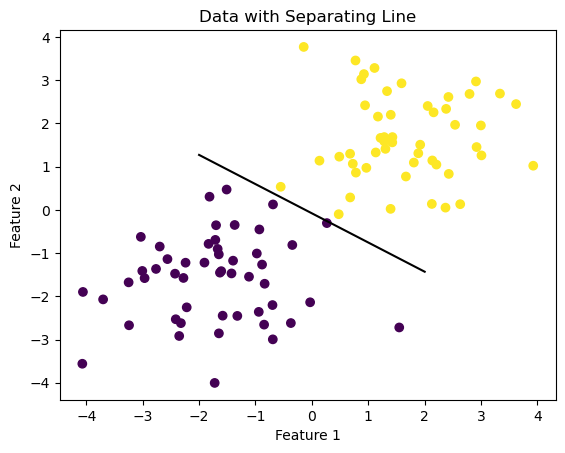

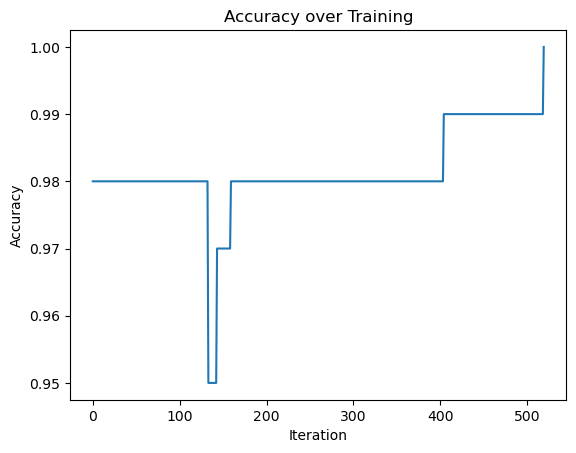

In [53]:
n = 100 
p_features = 3 

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

p = Perceptron() 
p.fit(X, y, max_steps = 1000)


data_fig = plt.scatter(X[:,0], X[:,1], c = y)
data_fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

plt.title("Data with Separating Line")

plt.show()

accuracy_fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

plt.title("Accuracy over Training")

plt.show()


## Experiment 2

In this experiment we also use 2d data, but **not** linearly separable, so that the perceptron algorithm will not converge to a weight vector $\tilde{w}$ that describes a separating line. It is possible to see that in the accuracy graph, the perceptron algorihtm never reaches a perfect accuracy 

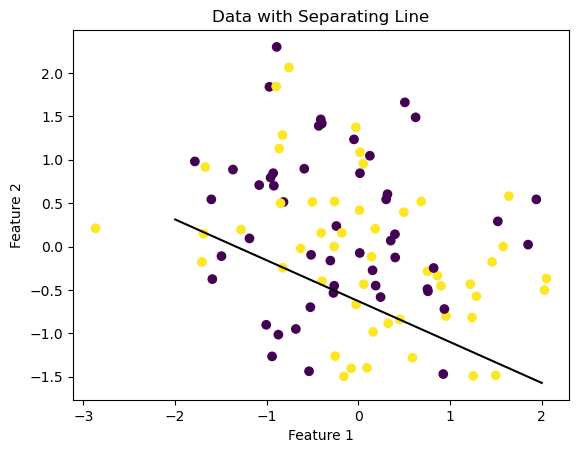

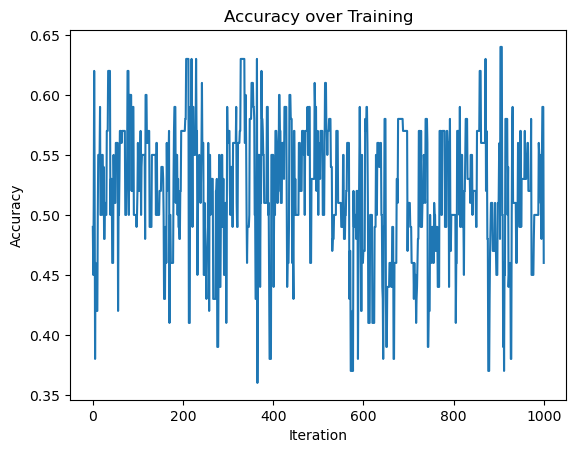

In [54]:
n = 100 
p_features = 3 

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(0, 0), (0, 0)])

p = Perceptron() 
p.fit(X, y, max_steps = 1000)


data_fig = plt.scatter(X[:,0], X[:,1], c = y)
data_fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

plt.title("Data with Separating Line")

plt.show()

accuracy_fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

plt.title("Accuracy over Training")

plt.show()

## Experiment 3

In this experiment we try to apply the perceptron algorithm in more than 2 dimensions. Here we try 5 features:


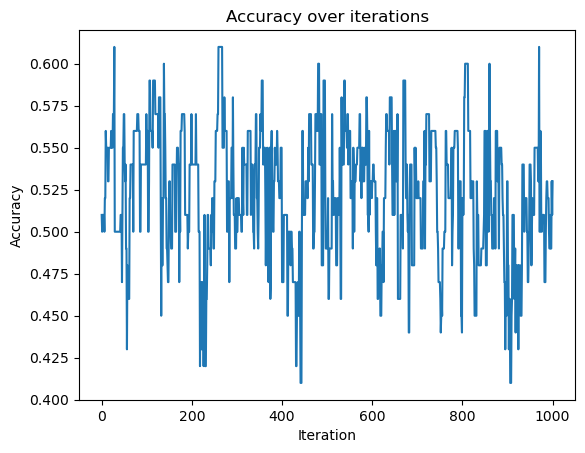

In [55]:
n = 100 
p_features = 5

X, y = make_blobs(n_samples = 100, n_features = p_features, centers = np.random.uniform(-1, 1, (2, p_features)))


p = Perceptron()
p.fit(X,y, max_steps = 1000)

accuracy_fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")
plt.title("Accuracy over iterations")

plt.show()

Based on the graph above, it does not seem that the data is linearly separable, as the accuracy does not seem to improve with the number of iterations making it unlikely that it will converge. 

# Writing 
**What is the runtime complexity of a single iteration of the perceptron algorithm update?**

First, choosing a random index takes constant time. Updating the weights involves a dot product between a row vector and the current weigths, and since both have length $p+1$ this takes $O(p)$ time. Next, we call the *score()* function. This function first calls *predict()* which takes $O(np)$ time as it involves matrix multiplication between a $n \times p$ matrix and a $p \times 1$ vector. Finally, the *score()* function iterates over it's input, which is a vector of lenght $n$, so overall this function takes $O(np + n) = O(np)$ time. Hence, a single iteration of the perceptron algorithm update has a time complexity of $$O(p) + O(np) = O(np)$$